In [24]:
import yfinance as yf
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
tickers_list = ['EURUSD=X', 'GC=F', 'BTC-USD', 'AAPL', 'XOM', 'V', 'CL=F']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2020-01-01','2022-12-31')['Adj Close']

data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,EURUSD=X,GC=F,BTC-USD,AAPL,XOM,V,CL=F
Date,,,,,,,
2020-01-01,1.122083,NaN,7200.174316,NaN,NaN,NaN,NaN
2020-01-02,1.122083,1524.500000,6985.470215,73.449387,59.038692,187.007462,61.180000
2020-01-03,1.117144,1549.199951,7344.884277,72.735321,58.564049,185.520187,63.049999
2020-01-06,1.116196,1566.199951,7769.219238,73.314880,59.013714,185.118973,63.270000
2020-01-07,1.119799,1571.800049,8163.692383,72.970078,58.530754,184.629745,62.700001


In [21]:
data.columns = ['EUR', 'GOLD', 'Bitcoin', 'Apple', 'Exxon', 'VISA', 'Oil']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2020-01-01 to 2022-12-30
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR      783 non-null    float64
 1   GOLD     757 non-null    float64
 2   Bitcoin  783 non-null    float64
 3   Apple    756 non-null    float64
 4   Exxon    756 non-null    float64
 5   VISA     756 non-null    float64
 6   Oil      758 non-null    float64
dtypes: float64(7)
memory usage: 48.9 KB


In [19]:
data.to_csv('mvp_data.csv')

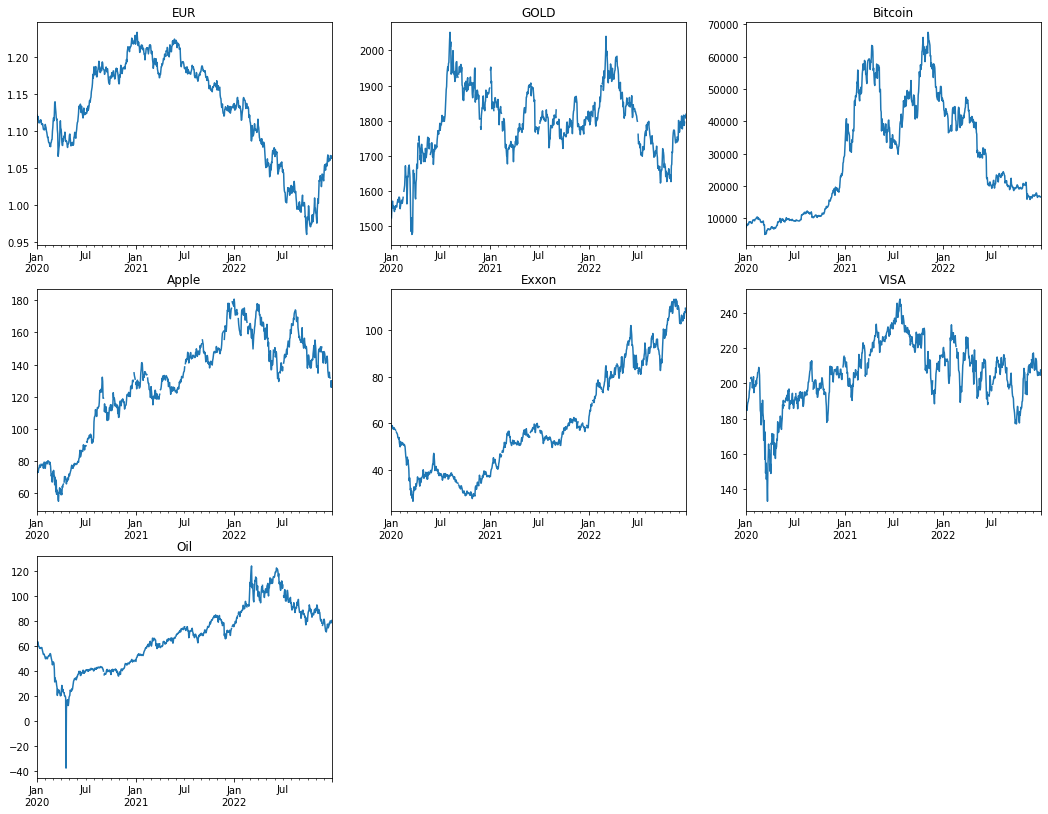

In [45]:
plt.figure(figsize=(18, 12))
plt.subplots_adjust(top=1)

for i, company in enumerate(data.columns, 1):
    plt.subplot(3, 3, i)
    data[company].plot()
    plt.xlabel(None)
    plt.title(company)

plt.show()

In [68]:
# заполним пропуски последними известными значениями, так как пропуски чаще всего - это праздничные периоды
# перейдем на недельный интервал и средним значениям на них
data_w = data.fillna(method='ffill').resample('W').ffill()

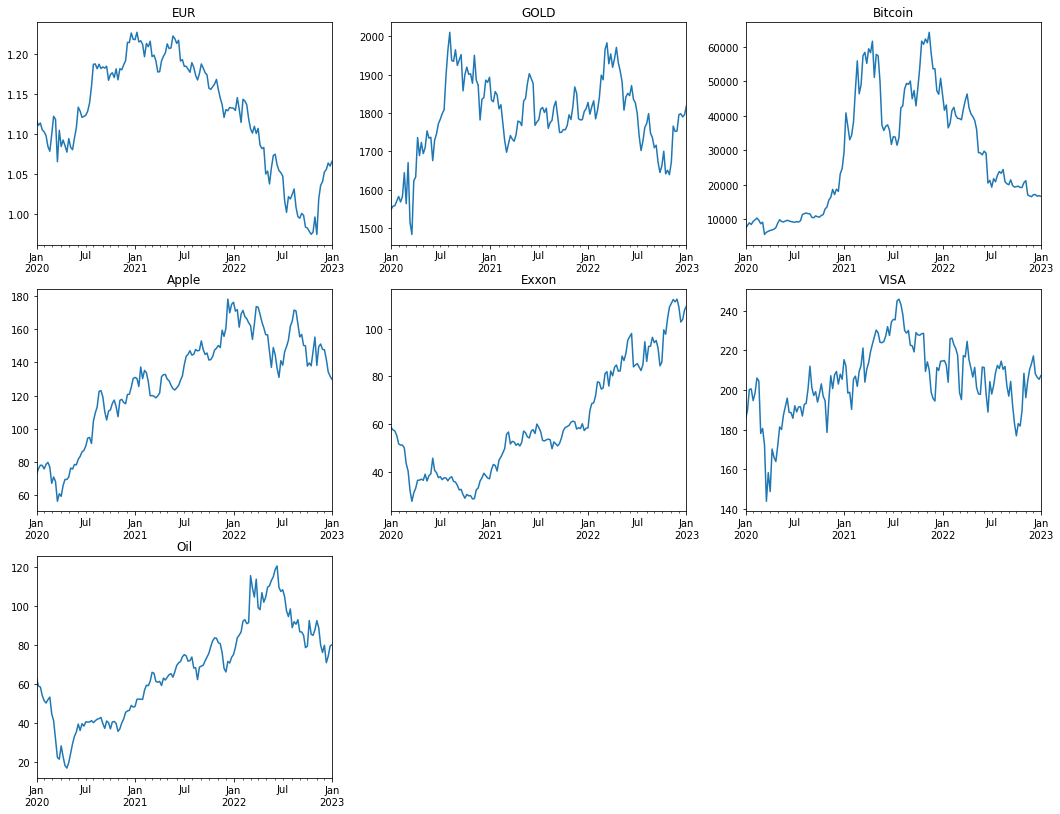

In [69]:
plt.figure(figsize=(18, 12))
plt.subplots_adjust(top=1)

for i, company in enumerate(data_w.columns, 1):
    plt.subplot(3, 3, i)
    data_w[company].plot()
    plt.xlabel(None)
    plt.title(company)

plt.show()

In [65]:
data_w.describe()

,EUR,GOLD,Bitcoin,Apple,Exxon,VISA,Oil
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,1.126145,1789.835669,28832.153261,128.780573,60.598549,205.281552,67.411975
std,0.068399,102.576812,17123.017097,30.838323,23.421027,17.980239,24.804187
min,0.974963,1484.000000,5563.707031,56.192776,27.654110,143.878571,16.940001
25%,1.080696,1736.199951,11592.489258,115.031372,39.385204,195.100693,45.529999
50%,1.132503,1795.900024,23804.632812,133.759903,55.719032,206.062943,68.440002
75%,1.183572,1855.699951,42407.937500,149.485107,82.157288,215.340714,85.110001
max,1.227144,2010.099976,64155.941406,178.142532,112.345512,245.898636,120.669998


In [67]:
data_w.resample('Y').ffill()

,EUR,GOLD,Bitcoin,Apple,Exxon,VISA,Oil
Date,,,,,,,
2020-12-31,1.218472,1879.900024,24664.791016,130.205780,37.406956,205.466141,48.230000
2021-12-31,1.132734,1811.199951,50822.195312,174.995621,58.243519,214.573425,73.790001
2022-12-31,1.060333,1795.900024,16796.953125,131.658981,107.850105,205.427643,79.559998
2023-12-31,1.066075,1819.699951,16602.585938,129.731918,109.457741,207.353867,80.260002


In [70]:
norm_data_w=(data_w-data_w.mean())/data_w.std()

<Figure size 1296x864 with 0 Axes>

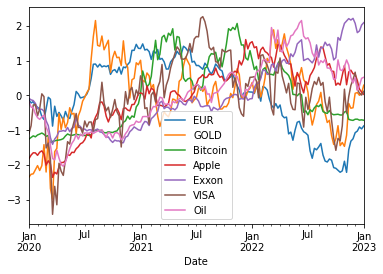

In [75]:
plt.figure(figsize=(18, 12))
norm_data_w.plot()
plt.show()

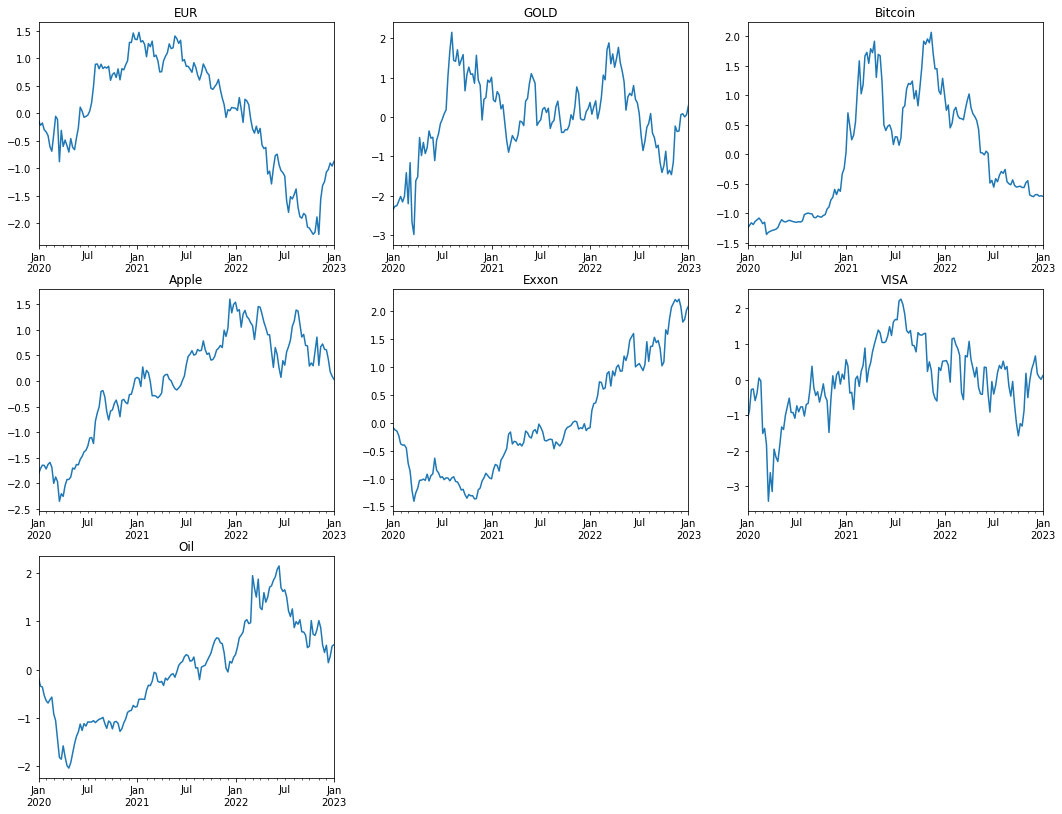

In [71]:
plt.figure(figsize=(18, 12))
plt.subplots_adjust(top=1)

for i, company in enumerate(norm_data_w.columns, 1):
    plt.subplot(3, 3, i)
    norm_data_w[company].plot()
    plt.xlabel(None)
    plt.title(company)

plt.show()

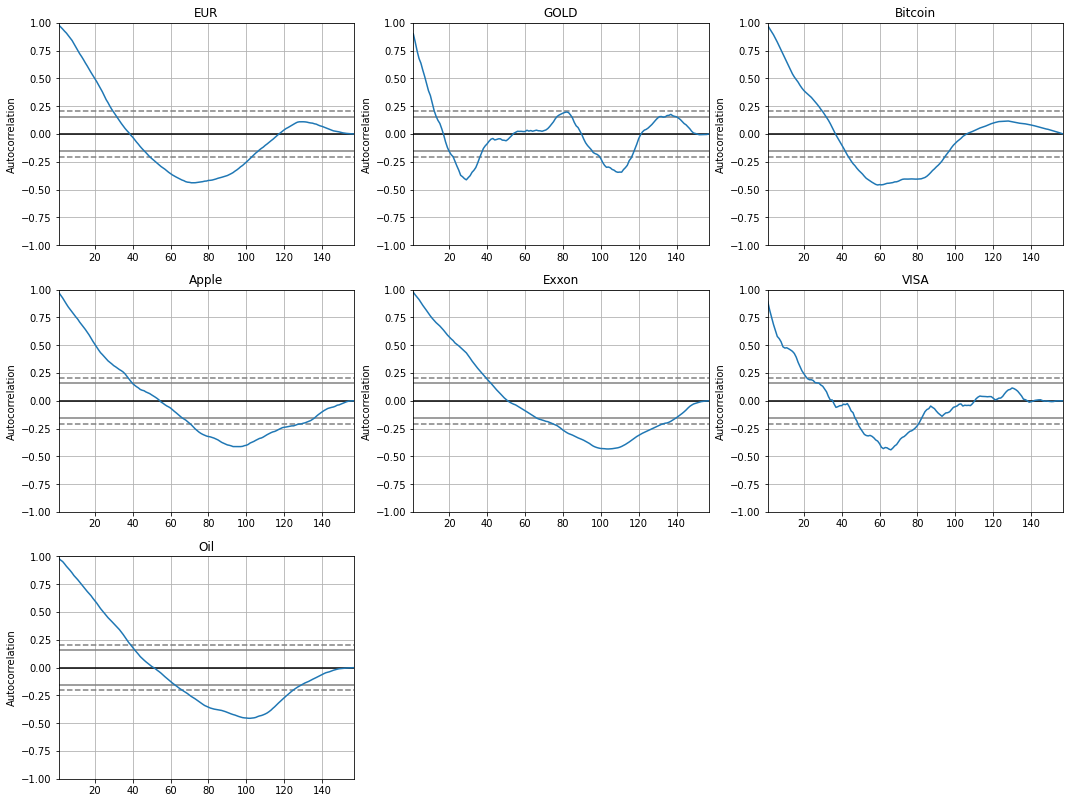

In [84]:
# графики автокорреляции
plt.figure(figsize=(18, 12))
plt.subplots_adjust(top=1)

for i, company in enumerate(data_w.columns, 1):
    plt.subplot(3, 3, i)
    pd.plotting.autocorrelation_plot(data_w[company])
    plt.xlabel(None)
    plt.title(company)

plt.show()

<AxesSubplot:>

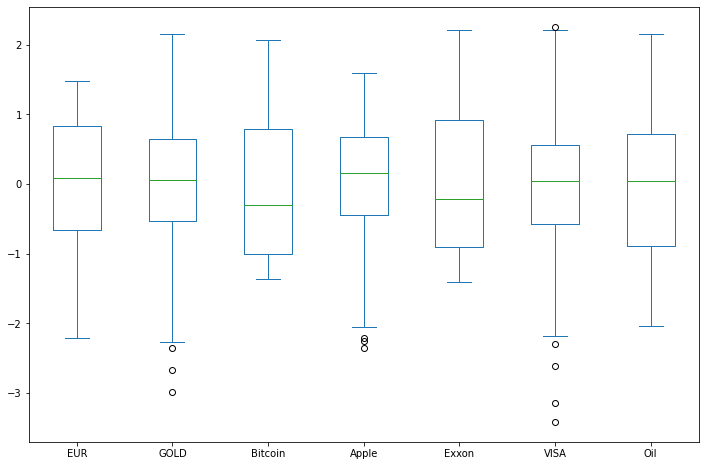

In [142]:
# выбросы недельных нормализованных данных
norm_data_w.plot.box(figsize=(12, 8))

In [93]:
# по месяцам
data_m = data_w.resample('M').ffill()
pct_data_m = data_m.pct_change()

<AxesSubplot:ylabel='Frequency'>

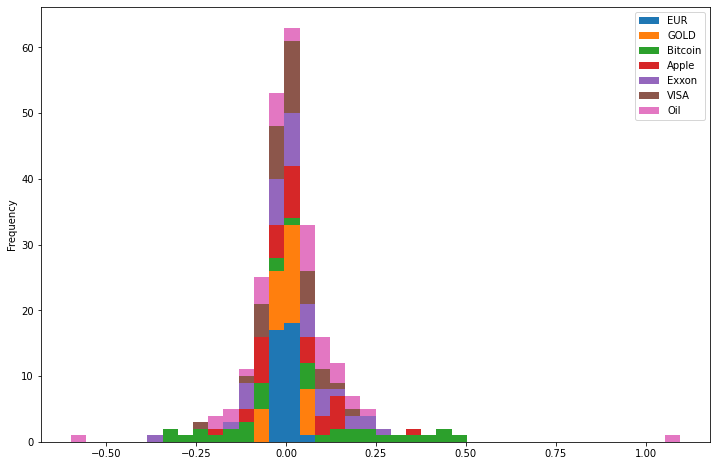

In [119]:
# распределение месячных % изменений
pct_data_m.plot.hist(stacked=True, bins=40, figsize=(12, 8))

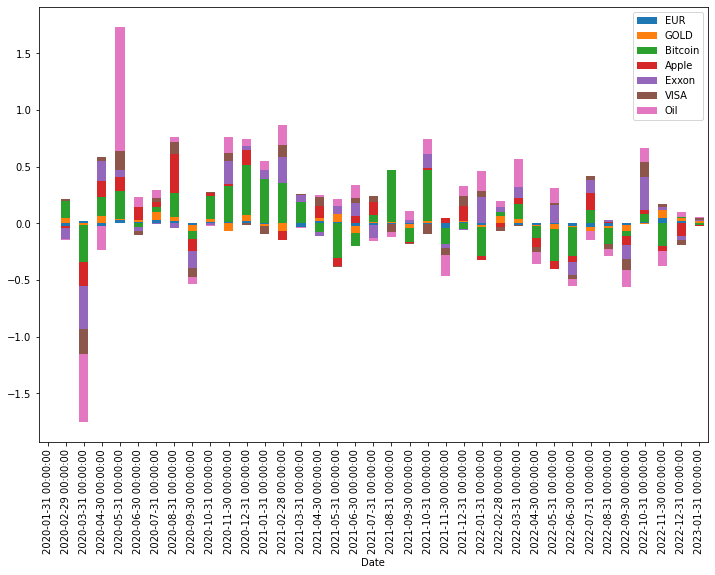

In [124]:
pct_data_m.plot.bar(stacked=True, figsize=(12, 8))
#plt.axis('off')
plt.show()

In [152]:
corr_pct_m = pct_data_m.corr()
corr_pct_m.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-152-bb4cbed271d8>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_pct_m.style.background_gradient(cmap='coolwarm').set_precision(2)


,EUR,GOLD,Bitcoin,Apple,Exxon,VISA,Oil
EUR,1.00,0.40,0.06,0.03,-0.11,0.19,0.21
GOLD,0.40,1.00,0.08,0.28,-0.11,0.06,-0.01
Bitcoin,0.06,0.08,1.00,0.40,0.31,0.20,0.32
Apple,0.03,0.28,0.40,1.00,0.21,0.58,0.31
Exxon,-0.11,-0.11,0.31,0.21,1.00,0.60,0.46
VISA,0.19,0.06,0.20,0.58,0.60,1.00,0.64
Oil,0.21,-0.01,0.32,0.31,0.46,0.64,1.00


<AxesSubplot:>

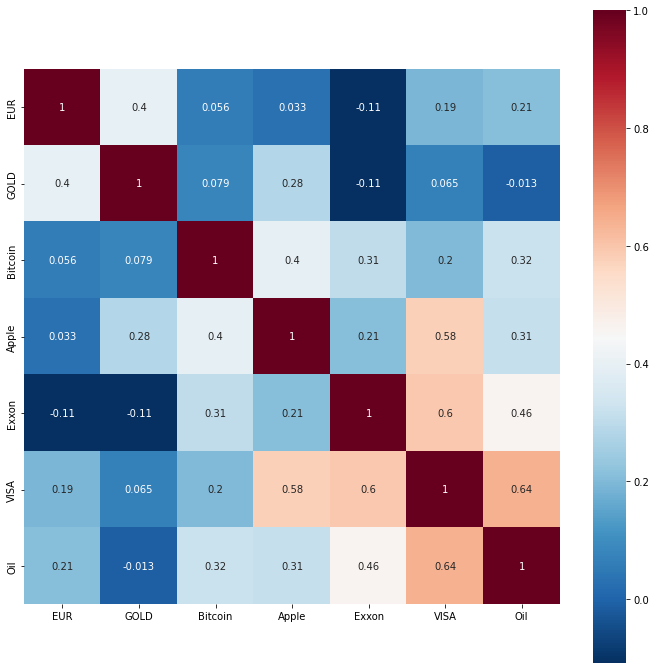

In [157]:
import seaborn as sns
plt.subplots(figsize=(12, 12))
sns.heatmap(corr_pct_m, square=True, annot=True, cmap='RdBu_r')

Есть корреляция некоторых фондовых инструментов, и это еще нет инструментов из одного сектора. Можно ожидать, что будет больше корреляция

In [103]:
# по годам
data_y = data_w.resample('Y').ffill()
pct_data_y = data_y.pct_change()

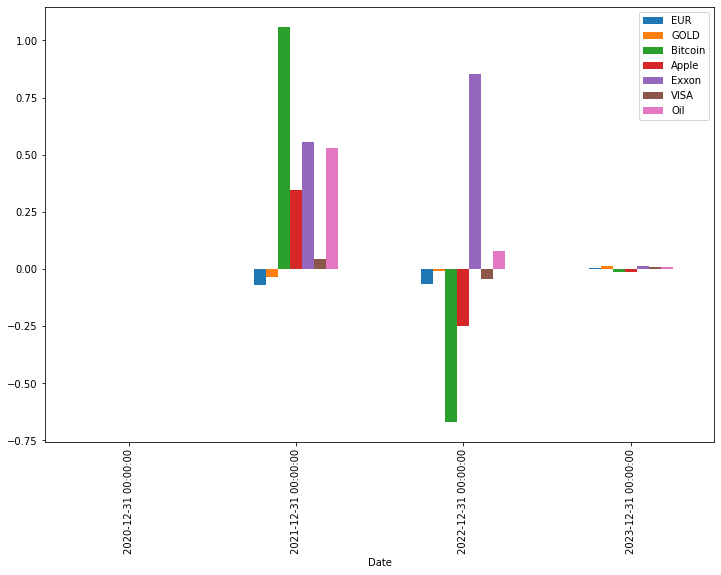

In [105]:
pct_data_y.plot.bar(stacked=False, figsize=(12, 8))
plt.show()

In [106]:
pct_data_y

,EUR,GOLD,Bitcoin,Apple,Exxon,VISA,Oil
Date,,,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,-0.070365,-0.036545,1.060516,0.343993,0.557024,0.044325,0.529961
2022-12-31,-0.063917,-0.008447,-0.669496,-0.247644,0.851710,-0.042623,0.078195
2023-12-31,0.005416,0.013252,-0.011572,-0.014637,0.014906,0.009377,0.008798


In [109]:
# ЗДЕСЬ НАДО СДЕЛАТЬ ПО ДРУГОМУ - есть погрешности по сравнению со спосбом выше, проверить
# но для выводов погрешностями можно пернебречь
tmp_pct_data_y = pct_data_m.resample('Y').sum()[:-1]

In [159]:
tmp_pct_data_y.index

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31'], dtype='datetime64[ns]', name='Date', freq='A-DEC')

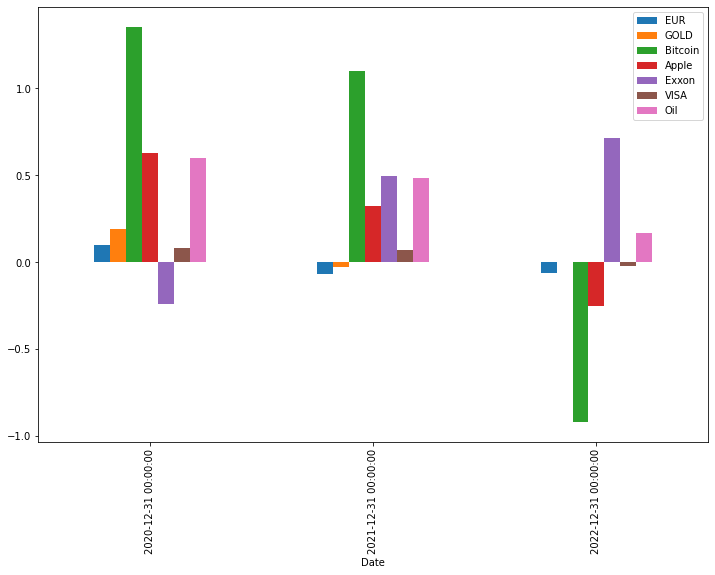

In [175]:
import matplotlib.dates as mdates

ax = tmp_pct_data_y.plot.bar(stacked=False, figsize=(12, 8))
#ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#ax.set_xticks(tmp_pct_data_y.index)
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
# ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))
# myFmt = mdates.DateFormatter('%y-%m-%d')
# ax.xaxis.set_major_formatter(myFmt)
plt.show()

In [120]:
tmp_pct_data_y

,EUR,GOLD,Bitcoin,Apple,Exxon,VISA,Oil
Date,,,,,,,
2020-12-31,0.099802,0.190968,1.354316,0.627229,-0.239478,0.080348,0.597158
2021-12-31,-0.070886,-0.028785,1.100836,0.324079,0.494661,0.068630,0.486028
2022-12-31,-0.063389,-0.000409,-0.918766,-0.252923,0.714407,-0.023723,0.167118
